In [33]:
from hilbert_curve import image_descriptor as hilbert_descriptor
from descriptors import keypoint_detector
from pathlib import Path
import numpy as np
import cv2 as cv
import time

In [14]:
source_dir = Path('../caltech-101/segmented_images')
mask_dir = Path('../caltech-101/masks')

## Tempo de processamento do descritor

In [30]:
time_descritor = []

In [31]:
for classdir in source_dir.iterdir():
    for f in classdir.iterdir():
        
        im = cv.imread(str(f), cv.IMREAD_GRAYSCALE)
        
        mask_path = mask_dir / classdir.name / f.name
        mask = cv.imread(str(mask_path), cv.IMREAD_GRAYSCALE)
        
        kp = keypoint_detector(im, mask)

        t1 = time.time()
        desc = hilbert_descriptor(im, kp)
        t2 = time.time()
        
        time_descritor.append(t2-t1)


In [34]:
time_array = np.asarray(time_descritor)
print(np.average(time_array))

0.3604851814738491


## Tempo de cada etapa do descritor

In [47]:
from PIL import Image 
import hilbert_curve as hilbert
import descriptors

In [43]:
img_array = im
img = Image.fromarray(im)

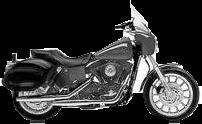

In [45]:
img

In [68]:
%%time
curve_coordinates = hilbert.hilbert_order(min(img.size), img.size)

CPU times: user 36.7 ms, sys: 8 ms, total: 44.7 ms
Wall time: 43.6 ms


In [69]:
keypoints = descriptors.keypoint_detector(im, mask)
kp = keypoints[0]

In [70]:
%%time
roi = hilbert.roi_curve(img_array, curve_coordinates, kp)

CPU times: user 685 µs, sys: 7 µs, total: 692 µs
Wall time: 697 µs


In [71]:
roi

(None, None)

In [72]:
(x, y) = (int(kp.pt[0]), int(kp.pt[1]))

In [73]:
neighborhood = [
    (x-1,y), (x+1,y), (x,y-1), (x,y+1), 
    (x+1, y+1), (x+1, y-1), (x-1, y-1), (x-1, y+1)
]

i=0

In [74]:
%%time
while roi[0] is None and i < len(neighborhood):

    kp = neighborhood[i]
    roi = hilbert.roi_curve(img_array, curve_coordinates, kp)
    i += 1

CPU times: user 2.1 ms, sys: 0 ns, total: 2.1 ms
Wall time: 2.11 ms


In [78]:
%%time
hilbert.roi_descriptor(roi[0])

CPU times: user 2.59 ms, sys: 0 ns, total: 2.59 ms
Wall time: 2.11 ms


array([ 52.22386867,  29.29985297,   2.14635517,   0.88423886,
       221.54168526,   3.00812414])

### Alternativa

Gera o trecho da curva para o ponto de interesse 

In [80]:
keypoints = descriptors.keypoint_detector(im, mask)

In [82]:
kp = keypoints[0]
(x, y) = (int(kp.pt[0]), int(kp.pt[1]))
x,y

(9, 63)

In [87]:
from hilbertcurve.hilbertcurve import HilbertCurve

In [103]:
im.shape

(124, 202)

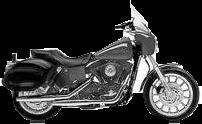

In [101]:
img

In [97]:
p=128
n=2

In [98]:
hilbert_curve = HilbertCurve(p, n)

In [105]:
h = im.shape[0]
w = im.shape[1]

In [121]:
p1 = round(9/(w/p))

In [128]:
p2 = round(63/(h/p))

In [129]:
p1, p2

(23, 260)

In [120]:
hilbert_curve.distances_from_points([[p1,p2]])

[101]